In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#N_list = [2** (2 + i) for i in range(1,13)]

# Import data for regular
N_list = [500, 1000, 2000, 4000]
N_weak = [500,500,500, 500]
N_strong = [4000, 2000, 1000, 500]

size_weak = [1, 2, 4, 8]
size_strong = [1, 2, 4, 8]

print(N_list)
epoch_list = [30000]
seed_list = np.arange(1234, 1242)
epochs = epoch_list[0]
seed_list = [1234, 1235,1236, 1237, 1238, 1239, 1240, 1241]

def read_dict(name):
    my_dict = np.load(name + '.npy', allow_pickle = True)

    texec = my_dict.item().get('texec')
    err = my_dict.item().get('err')[-1]
    train = my_dict.item().get('train')
    test = my_dict.item().get('test')
    metrics = my_dict.item().get('metrics')[:, 2]  
    times = my_dict.item().get('times')
    pointsec = my_dict.item().get('pointsec')

    n = times.shape[0]

    res1 = pd.DataFrame({
            'N': n * [N],
            'seed': n * [seed],
            'train': train,
            'test': test,
            'metrics': metrics,
            'times': times,
            'iteration' : np.arange(n) * 500,
            'pointsec': pointsec})    
        
    res2 = pd.DataFrame({
        'scaling': [0],
        'N': [N],
        'seed': [seed],
        'err': [err],
        'texec': [texec],
        'pointsec': [np.mean(pointsec)]
    })
    
    return res1, res2
    
df = pd.DataFrame(columns = ['train', 'test', 'metrics', 'times'])    
df_summary = pd.DataFrame(columns = ['err', 'texec'])
precision_list = []

for i in range(len(N_list)):
    N = N_list[i]
    Nw = N_weak[i]
    Ns = N_strong[i]
    sw = size_weak[i]
    sn = size_weak[i]
    ss = size_strong[i]

    #precision_list.append(N / 8)
    for seed in seed_list:
        
        scaling = 'none'    
        name = 'results/' + 'seed' + str(seed) + '_N'+ str(N) + '_epochs' + str(epochs) + '_size1'
        df1, df2 = read_dict(name)   
        n = df1.shape[0]
        df2['scaling'] = [scaling]
        df2['size'] = [sn]
        df2['pointsectot'] = df2['pointsec']
        df1['scaling'] = n * [scaling]
        df_summary = pd.concat([df_summary,df2])
        df = pd.concat([df, df1])
        
        eff1 = df2['texec']
        
        scaling = 'strong'
        name = 'results/' + 'seed' + str(seed) + '_N'+ str(Ns) + '_epochs' + str(epochs) + '_size' + str(ss)
        df1, df2 = read_dict(name)    
        n = df1.shape[0]
        df2['scaling'] = [scaling]
        df2['size'] = [ss]
        df2['pointsectot'] = ss * df2['pointsec']
        df1['scaling'] = n * [scaling]
        
        effw = eff1 / df2['texec']
        print(df2['texec'], 'p')
        print(eff1, '1')
        print(effw, 'effw')
        #if seed == 1234:
        #    print(Ns, ss, scaling)
        
        df_summary = pd.concat([df_summary,df2])
        df = pd.concat([df, df1])
        
        scaling = 'weak'
        name = 'results/' + 'seed' + str(seed) + '_N'+ str(Nw) + '_epochs' + str(epochs) + '_size' + str(sw)
        df1, df2 = read_dict(name)    
        n = df1.shape[0]
        df2['scaling'] = [scaling]
        df2['pointsectot'] = sw * df2['pointsec']
        df1['scaling'] = n *[scaling]
        df2['size'] = [sw]
        
        df_summary = pd.concat([df_summary,df2])
        df = pd.concat([df, df1])
        
        #if seed == 1234:
        #    print(Ns, ss, scaling, 'adasum')
        
        
df_summary = df_summary.reset_index(drop=True)
df_summary['N'] = df_summary['N'].astype(int).astype("category")
df_summary['size'] = df_summary['size'].astype(int).astype("category")
df_summary['seed'] = df_summary['seed'].astype("category")

df_summary['err_log'] = np.log10(df_summary['err'])
df_summary['pointsec_log'] = np.log10(df_summary['pointsec'])
df_summary['pointsectot_log'] = np.log10(df_summary['pointsectot'])
df_summary['scaling'] = df_summary['scaling'].astype('category')
df['iteration'] = df['iteration'].astype(int)


[500, 1000, 2000, 4000]
0    633.756639
Name: texec, dtype: float64 p
0    610.30225
Name: texec, dtype: float64 1
0    0.962991
Name: texec, dtype: float64 effw
0    565.457313
Name: texec, dtype: float64 p
0    604.334116
Name: texec, dtype: float64 1
0    1.068753
Name: texec, dtype: float64 effw
0    607.076386
Name: texec, dtype: float64 p
0    582.93944
Name: texec, dtype: float64 1
0    0.960241
Name: texec, dtype: float64 effw
0    618.697485
Name: texec, dtype: float64 p
0    612.483958
Name: texec, dtype: float64 1
0    0.989957
Name: texec, dtype: float64 effw
0    602.277734
Name: texec, dtype: float64 p
0    622.664202
Name: texec, dtype: float64 1
0    1.033849
Name: texec, dtype: float64 effw
0    569.859099
Name: texec, dtype: float64 p
0    632.986591
Name: texec, dtype: float64 1
0    1.110777
Name: texec, dtype: float64 effw
0    614.289813
Name: texec, dtype: float64 p
0    623.935199
Name: texec, dtype: float64 1
0    1.015702
Name: texec, dtype: float64 effw
0    

In [3]:
rgb = [(236, 0, 84), (254, 64, 18), (38, 174, 65), (44, 95, 177)]
rgb = [(e[0] / 255.0, e[1] / 255.0, e[2] / 255.0) for e in rgb]
pink = rgb[0]
orange = rgb[1]
green = rgb[2]
blue = rgb[3]

cmap_neo = sns.color_palette([orange,blue,green], n_colors=3)

colors = [pink, pink, pink,
          blue, blue, blue, blue,
         green, green, green, green, green, green, green, green, green, green]
my_palette = sns.color_palette(colors, n_colors=16)
my_palette
cmap = sns.color_palette([pink, blue, green, orange], n_colors=4)
cmap_r = sns.color_palette([orange, green, blue, pink], n_colors=4)


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


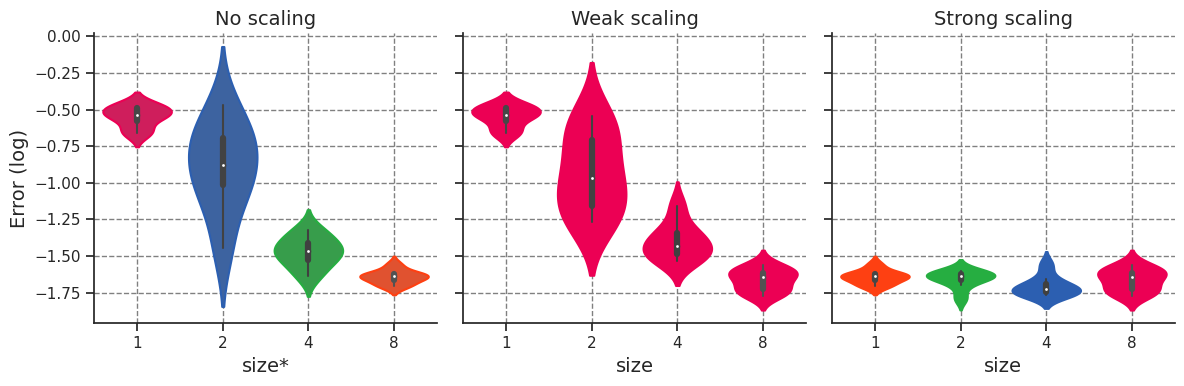

In [4]:
sns.set(style="ticks")
g = sns.FacetGrid(df_summary, hue='N', col='scaling', col_order=['none','weak','strong'], palette=cmap, height=4)
g.map(sns.violinplot, 'size',"err_log")

titles = ['No scaling', 'Weak scaling', 'Strong scaling']
ll = 0
for ax in g.axes.flatten():
    ax.grid(linestyle='--', color='grey')
    for i in range(4):
        ax.collections[2*i].set_edgecolor(cmap[i])
    ax.set_title(titles[ll], fontsize=14)
    if ll == 1:
        for i in range(4):
            ax.collections[2*i].set_color(pink)

    if ll == 2:
        for i in range(4):
            ax.collections[2*i].set_color(cmap_r[i])

    ll += 1

ax1, ax2, ax3 = g.axes.flatten()
g.set_xlabels('size', fontsize=14)
g.set_ylabels('Error (log)', fontsize=14)
ax1.set_xlabel('size*', fontsize=14)

plt.savefig('plots/hAnalisisSchrodinger.pdf')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


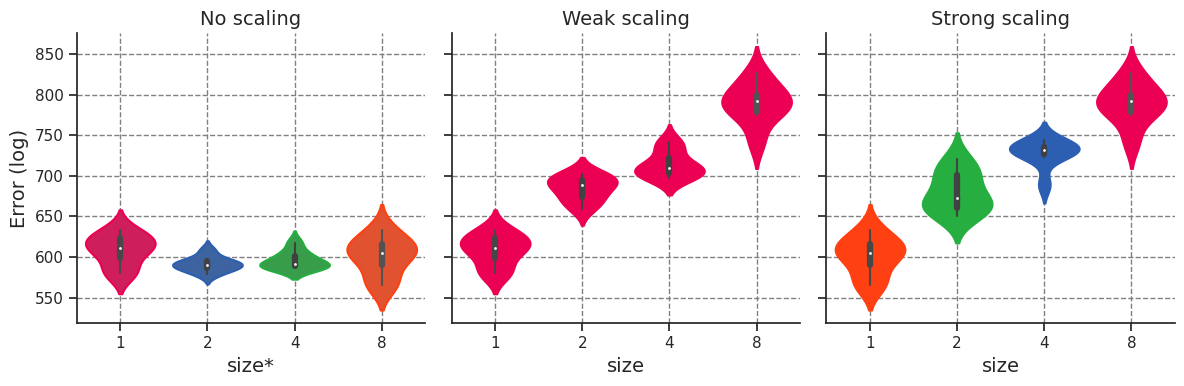

In [5]:
sns.set(style="ticks")
g = sns.FacetGrid(df_summary, hue='N', col='scaling', col_order=['none','weak','strong'], palette=cmap, height=4)
g.map(sns.violinplot, 'size',"texec")

titles = ['No scaling', 'Weak scaling', 'Strong scaling']
ll = 0
for ax in g.axes.flatten():
    ax.grid(linestyle='--', color='grey')
    for i in range(4):
        ax.collections[2*i].set_edgecolor(cmap[i])
    ax.set_title(titles[ll], fontsize=14)
    if ll == 1:
        for i in range(4):
            ax.collections[2*i].set_color(pink)

    if ll == 2:
        for i in range(4):
            ax.collections[2*i].set_color(cmap_r[i])

    ll += 1

ax1, ax2, ax3 = g.axes.flatten()
g.set_xlabels('size', fontsize=14)
g.set_ylabels('Error (log)', fontsize=14)
ax1.set_xlabel('size*', fontsize=14)

plt.savefig('plots/tAnalisisSchrodinger.pdf')

In [6]:
df_summary.columns

Index(['err', 'texec', 'scaling', 'N', 'seed', 'pointsec', 'size',
       'pointsectot', 'err_log', 'pointsec_log', 'pointsectot_log'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


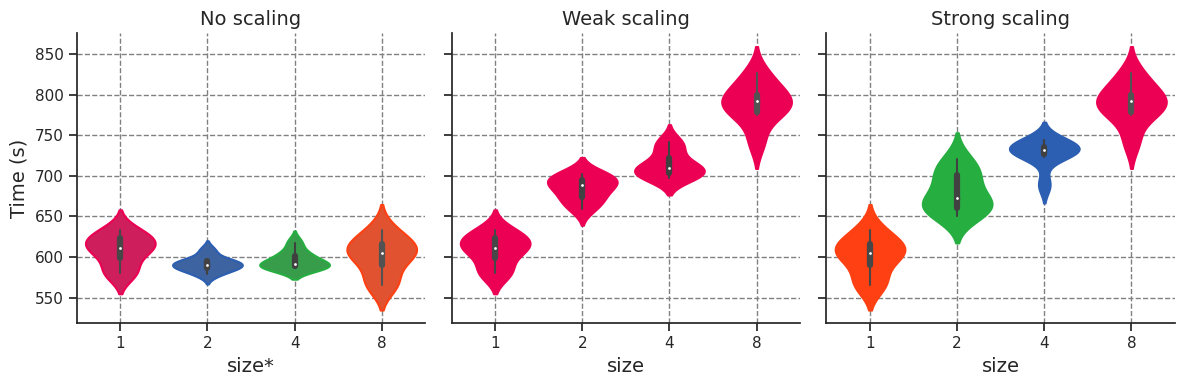

In [7]:
sns.set(style="ticks")
g = sns.FacetGrid(df_summary, hue='N', col='scaling', col_order=['none','weak','strong'], palette=cmap, height=4)
g.map(sns.violinplot, 'size',"texec")


titles = ['No scaling', 'Weak scaling', 'Strong scaling']
ll = 0
for ax in g.axes.flatten():
    ax.grid(linestyle='--', color='grey')
    for i in range(4):
        ax.collections[2*i].set_edgecolor(cmap[i])
    ax.set_title(titles[ll], fontsize=14)
    if ll == 1:
        for i in range(4):
            ax.collections[2*i].set_color(pink)

    if ll == 2:
        for i in range(4):
            ax.collections[2*i].set_color(cmap_r[i])

    ll += 1

ax1, ax2, ax3 = g.axes.flatten()
g.set_xlabels('size', fontsize=14)
g.set_ylabels('Time (s)', fontsize=14)
ax1.set_xlabel('size*', fontsize=14)

plt.savefig('plots/tAnalisisSchrodinger.pdf')

In [8]:
#1 GPU: 5484.3 +-16289.4
#2 GPUs: 4718.2 +-16121.4
#4 GPUs: 4501.3 +-16274.0
#6 GPUs: 4310.2 +-15985.5
#8 GPUs: s


In [20]:
#Weak
size = [1,2,4,8]
none = np.array([27049 * size[i] for i in range(4)])

weak_N0 = np.array([27049,
                   24286 * 2,
                    23218 * 4,
                    20887 * 8
                   ])

weak_eff_N0 = np.array([100,
                 24286 / 27049 * 100,
                 23218 / 27049 * 100,
                 20887 / 27049 * 100])

#Strong
            
size = [1,2,4,8]
none = np.array([27049 * 8 for i in range(4)])

strong_N0 = np.array([219292,
                   97923 * 2,
                    45649 * 4,
                    20887 * 8
                   ])

strong_eff_N0 = strong_N0 / strong_N0[0] * 100


In [28]:
weak_N0

array([ 27049,  48572,  92872, 167096])

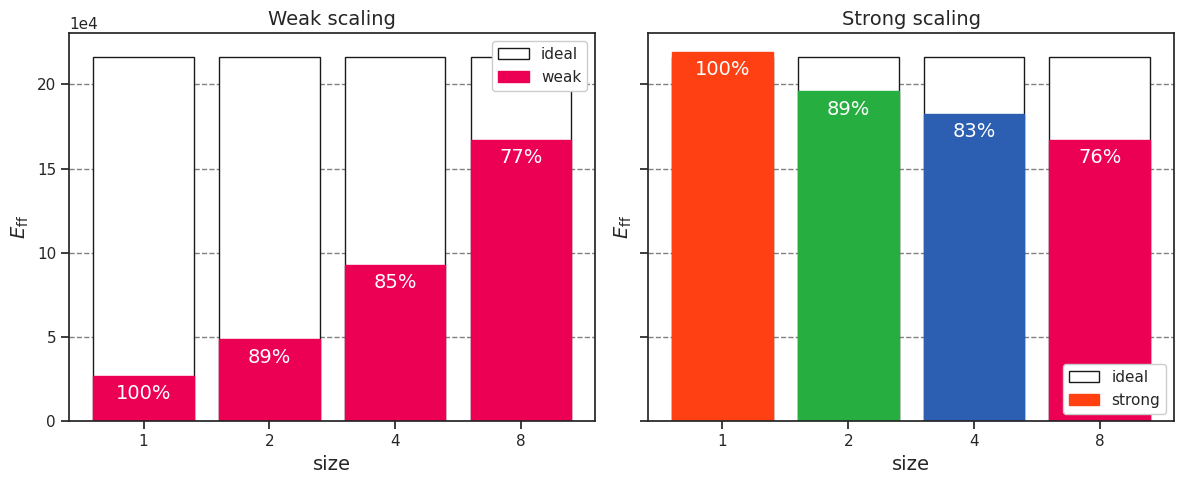

<Figure size 640x480 with 0 Axes>

In [26]:

size = np.array([1,2,3,4])
ax1.grid(linestyle='--', color='grey', axis= 'y')

ax1.set_xticks(ticks=[1,2,3,4], labels=['1','2','4','8' ])
ax1.bar(size, none, color = 'white', edgecolor='k', label='ideal')
ax1.bar(size, weak_N0, color = pink, edgecolor=pink, label='weak')

ax1.set_ylabel('pointsec', fontsize=14)
ax1.set_xlabel('size', fontsize=14)
ax1.set_title('Weak scaling', fontsize=14)
ax1.ticklabel_format(axis='y', style='sci', scilimits=(4,4))

ax1.legend(framealpha=1)


size = np.array([1,2,3,4])
ax2.grid(linestyle='--', color='grey', axis= 'y')

ax2.set_xticks(ticks=[1,2,3,4], labels=['1','2','4','8' ])
ax2.bar(size, none, color = 'white', edgecolor='k', label='ideal')
ax2.bar(size, strong_N0, color = cmap_r, edgecolor=cmap_r, label='strong')

ax2.set_ylabel('pointsec', fontsize=14)
ax2.set_xlabel('size', fontsize=14)
ax2.set_title('Strong scaling', fontsize=14)

ax2.legend(loc = 'lower right', framealpha=1)

fig.tight_layout()


weak_eff_N0 = weak_eff_N0.astype(int).astype('str')
strong_eff_N0 = strong_eff_N0.astype(int).astype('str')

for i in range(weak_eff_N0.shape[0]):
    tt = weak_eff_N0[i]
    ax1.text(size[i], weak_N0[i]-5000, tt + '%', horizontalalignment='center',
        verticalalignment='top', color = 'white',fontsize=14)

for i in range(strong_eff_N0.shape[0]):
    tt = strong_eff_N0[i]
    ax2.text(size[i], strong_N0[i]-5000, tt + '%', horizontalalignment='center',
        verticalalignment='top', color = 'white',fontsize=14)    
    
plt.savefig('plots/SchrodingerEfficiency.pdf')    